# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"

#define url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
lats = []
lngs = []
countries = []
cloudinesses = []
humidities = []
max_temps = []
wind_speeds = []
dates = []
city_name = []

#set initial count quantities for organization
count= 0


# loops for creating dataframe columns

for city in cities:
    response = requests.get(query_url+city).json()
    try:
        city_name.append(response["name"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        countries.append(response["sys"]["country"])
        cloudinesses.append(response["clouds"]["all"])
        humidities.append(response["main"]["humidity"])
        max_temps.append(response["main"]["temp_max"])
        wind_speeds.append(response["wind"]["speed"])
        dates.append(response["dt"])
        count=count+1
        print(f"Processing Record {count}: {city}")
    except Exception:
        print("City not found...")
        print(response)
print('**********************************************************************************') 

Processing Record 1: walvis bay
Processing Record 2: bugene
Processing Record 3: mataura
Processing Record 4: troitsko-pechorsk
Processing Record 5: duobao
Processing Record 6: hirara
Processing Record 7: corner brook
Processing Record 8: ponta do sol
Processing Record 9: hobyo
Processing Record 10: srandakan
Processing Record 11: lebanon
Processing Record 12: alofi
Processing Record 13: provideniya
City not found...
{'cod': '404', 'message': 'city not found'}
Processing Record 14: mar del plata
Processing Record 15: hilo
Processing Record 16: tasiilaq
Processing Record 17: la ronge
Processing Record 18: tucurui
Processing Record 19: atuona
Processing Record 20: chapais
Processing Record 21: santa isabel do rio negro
Processing Record 22: east london
Processing Record 23: cape town
Processing Record 24: banda aceh
Processing Record 25: xacmaz
Processing Record 26: khandyga
Processing Record 27: busselton
Processing Record 28: talaya
Processing Record 29: cherskiy
Processing Record 30: 

Processing Record 214: kaitangata
Processing Record 215: nome
Processing Record 216: peniche
Processing Record 217: yumen
Processing Record 218: chicama
Processing Record 219: north bend
Processing Record 220: kapaa
Processing Record 221: nangong
City not found...
{'cod': '404', 'message': 'city not found'}
Processing Record 222: presque isle
Processing Record 223: bredasdorp
Processing Record 224: mount gambier
Processing Record 225: linxia
Processing Record 226: saskylakh
Processing Record 227: vostok
Processing Record 228: coahuayana
Processing Record 229: farafenni
Processing Record 230: fergus falls
Processing Record 231: bo phloi
Processing Record 232: bengkulu
Processing Record 233: kolokani
Processing Record 234: sao filipe
Processing Record 235: constitucion
Processing Record 236: cairns
Processing Record 237: kenora
City not found...
{'cod': '404', 'message': 'city not found'}
Processing Record 238: carman
Processing Record 239: egvekinot
Processing Record 240: narsipatnam
Pr

Processing Record 433: port moresby
Processing Record 434: luau
Processing Record 435: paramirim
Processing Record 436: halifax
City not found...
{'cod': '404', 'message': 'city not found'}
Processing Record 437: calvinia
Processing Record 438: keti bandar
Processing Record 439: otukpo
Processing Record 440: faanui
Processing Record 441: nanortalik
Processing Record 442: ketchikan
Processing Record 443: soe
Processing Record 444: judaberg
Processing Record 445: quesnel
Processing Record 446: mount isa
Processing Record 447: los llanos de aridane
Processing Record 448: bourail
City not found...
{'cod': '404', 'message': 'city not found'}
Processing Record 449: amahai
Processing Record 450: along
Processing Record 451: necochea
Processing Record 452: tanta
Processing Record 453: san fernando
Processing Record 454: tual
Processing Record 455: vao
Processing Record 456: westport
Processing Record 457: pangnirtung
City not found...
{'cod': '404', 'message': 'city not found'}
Processing Reco

In [5]:
city_name


['Walvis Bay',
 'Bugene',
 'Mataura',
 'Troitsko-Pechorsk',
 'Topaowan',
 'Hirara',
 'Corner Brook',
 'Ponta do Sol',
 'Hobyo',
 'Srandakan',
 'Lebanon',
 'Alofi',
 'Provideniya',
 'Mar del Plata',
 'Hilo',
 'Tasiilaq',
 'La Ronge',
 'Tucuruí',
 'Atuona',
 'Chapais',
 'Santa Isabel Rio Negro',
 'East London',
 'Cape Town',
 'Banda Aceh',
 'Xaçmaz',
 'Khandyga',
 'Busselton',
 'Talaya',
 'Cherskiy',
 'Stykkisholmur',
 'Esperance',
 'Natá',
 'Butaritari',
 'Arrecife',
 'Avarua',
 'Nikolskoye',
 'Rikitea',
 'Bluff',
 'La Asuncion',
 'Northam',
 'Onguday',
 'Puerto Nariño',
 'Jaru',
 'Zadar',
 'Airai',
 'Gamboma',
 'Varnavino',
 'Punta Arenas',
 'Praia da Vitória',
 'Kendari',
 'Korla',
 'Cidreira',
 'Lagoa',
 'Tosya',
 'Bereket',
 'Port Alfred',
 'Albany',
 'Tenkodogo',
 'São João da Barra',
 "Severo-Kuril'sk",
 'Labuan',
 'Prince Rupert',
 'Jamestown',
 'Kavieng',
 'Manavālakurichi',
 'Presidente Médici',
 'Lebu',
 'Ushuaia',
 'Paamiut',
 'Sitka',
 'Cockburn Town',
 'The Valley',
 'Kindu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
countries

['NA',
 'TZ',
 'NZ',
 'RU',
 'CN',
 'JP',
 'CA',
 'PT',
 'SO',
 'ID',
 'US',
 'NU',
 'RU',
 'AR',
 'US',
 'GL',
 'CA',
 'BR',
 'PF',
 'CA',
 'BR',
 'ZA',
 'ZA',
 'ID',
 'AZ',
 'RU',
 'AU',
 'RU',
 'RU',
 'IS',
 'AU',
 'PA',
 'KI',
 'ES',
 'CK',
 'RU',
 'PF',
 'NZ',
 'VE',
 'GB',
 'RU',
 'CO',
 'BR',
 'HR',
 'TL',
 'CG',
 'RU',
 'CL',
 'PT',
 'ID',
 'CN',
 'BR',
 'PT',
 'TR',
 'TM',
 'ZA',
 'US',
 'BF',
 'BR',
 'RU',
 'MY',
 'CA',
 'US',
 'PG',
 'IN',
 'BR',
 'CL',
 'AR',
 'GL',
 'US',
 'TC',
 'AI',
 'CD',
 'RE',
 'TZ',
 'RU',
 'ZA',
 'JP',
 'NA',
 'RU',
 'LK',
 'AU',
 'ZA',
 'MV',
 'US',
 'US',
 'HK',
 'PT',
 'RU',
 'AU',
 'EC',
 'CA',
 'MU',
 'PK',
 'MA',
 'BR',
 'TO',
 'US',
 'CA',
 'JP',
 'LY',
 'AU',
 'IN',
 'CZ',
 'NZ',
 'CN',
 'MX',
 'GL',
 'CA',
 'BR',
 'NG',
 'US',
 'PT',
 'ID',
 'TN',
 'PH',
 'FR',
 'GL',
 'RE',
 'IS',
 'RU',
 'RU',
 'MR',
 'GT',
 'CA',
 'UY',
 'BR',
 'BJ',
 'NO',
 'BR',
 'RU',
 'AO',
 'US',
 'RU',
 'US',
 'PF',
 'AU',
 'BW',
 'RU',
 'VE',
 'NO',
 'RU',
 'NZ',

In [34]:
# create a dictionary
weather_dict={
    "Cities":city_name,
    "Lat":lats,
    "Lng":lngs,
    "Country": countries,
    "Date": dates,
    "Cloudiness":cloudinesses,
    "Humidity":humidities,
     "Max Temp":max_temps,
    "Wind Speed":wind_speeds    
}
# Creat a data frame to put the dictionary in
weather_dataframe= pd.DataFrame(weather_dict)
#Save the dataframe to a csv file
weather_dataframe.to_csv('weather_df.csv')
# Show the head of the dataframe
weather_dataframe.head()

,Cities,Lat,Lng,Country,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Walvis Bay,-22.96,14.51,NA,1587049139,6,52,69.80,9.17
1,Bugene,-1.59,31.14,TZ,1587049139,65,57,70.52,3.65
2,Mataura,-46.19,168.86,NZ,1587049140,97,90,44.01,3.00
3,Troitsko-Pechorsk,62.71,56.20,RU,1587049140,100,78,36.36,8.63
4,Topaowan,30.67,112.69,CN,1587049140,95,73,69.13,12.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

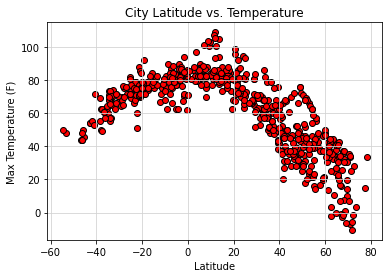

In [19]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Temperature.png")
plt.show()    

#### Latitude vs. Humidity Plot

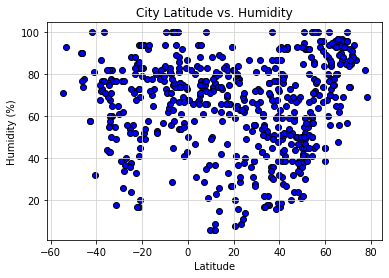

In [21]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Humidity.png")
plt.show()   

#### Latitude vs. Cloudiness Plot

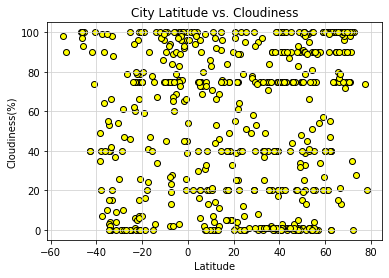

In [22]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker="o", facecolors="yellow", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()   

#### Latitude vs. Wind Speed Plot

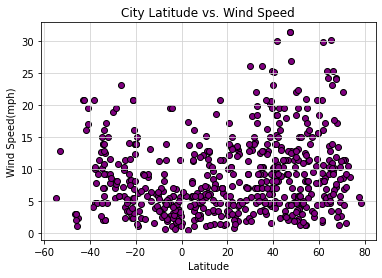

In [23]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker="o", facecolors="purple", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()  

## Linear Regression

The r-squared is: -0.8659854892354002


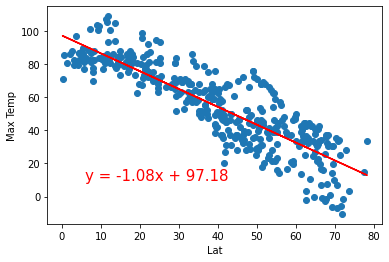

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
def Linear_Regression(x_values, y_values, x_label, y_lable, output_file):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_lable)
    plt.savefig(output_file)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0]
Southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<0]
Southern_hemisphere.head()

,Cities,Lat,Lng,Country,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Walvis Bay,-22.96,14.51,NA,1587049139,6,52,69.80,9.17
1,Bugene,-1.59,31.14,TZ,1587049139,65,57,70.52,3.65
2,Mataura,-46.19,168.86,NZ,1587049140,97,90,44.01,3.00
9,Srandakan,-7.94,110.25,ID,1587049142,94,81,81.43,6.60
11,Alofi,-19.06,-169.92,NU,1587049143,100,94,71.60,1.12


In [18]:
Northern_hemisphere.head()

,Cities,Lat,Lng,Country,Date,Cloudiness,Humidity,Max Temp,Wind Speed
3,Troitsko-Pechorsk,62.71,56.20,RU,1587049140,100,78,36.36,8.63
4,Topaowan,30.67,112.69,CN,1587049140,95,73,69.13,12.86
5,Hirara,24.80,125.28,JP,1587049140,0,64,70.21,12.91
6,Corner Brook,48.97,-57.95,CA,1587049107,90,69,35.60,11.41
7,Ponta do Sol,32.67,-17.10,PT,1587049141,40,60,68.00,21.92


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8659854892354002


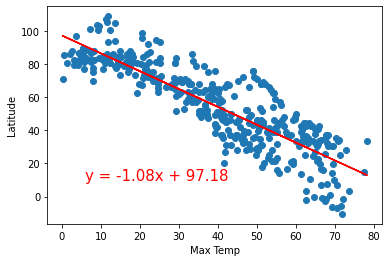

In [25]:
x_values = Northern_hemisphere['Lat']
y_values = Northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig("North Max Temp vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7428811844560641


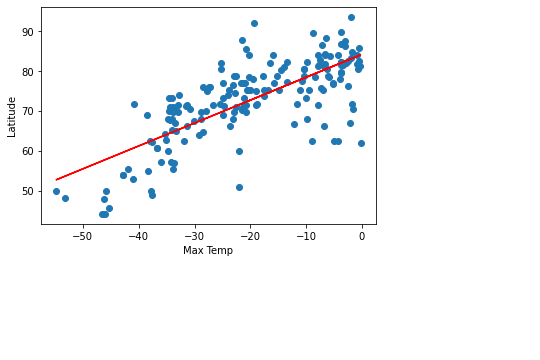

In [26]:
x_values = Southern_hemisphere['Lat']
y_values = Southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.savefig("Southern Max Temp vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2634454508357125


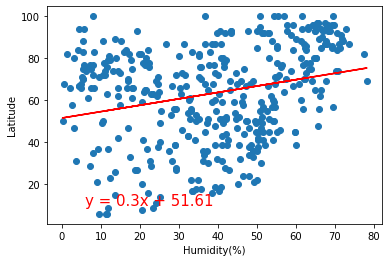

In [27]:
x_values = Northern_hemisphere['Lat']
y_values = Northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity(%)')
plt.ylabel('Latitude')
plt.savefig("North Humidity vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09467653707283728


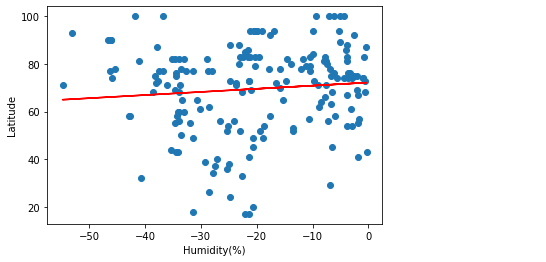

In [28]:
x_values = Southern_hemisphere['Lat']
y_values = Southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity(%)')
plt.ylabel('Latitude')
plt.savefig("Southern Humidity vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19691826978130703


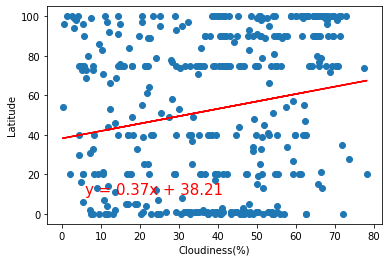

In [29]:
x_values = Northern_hemisphere['Lat']
y_values = Northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness(%)')
plt.ylabel('Latitude')
plt.savefig("North Cloudiness vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2274154901267715


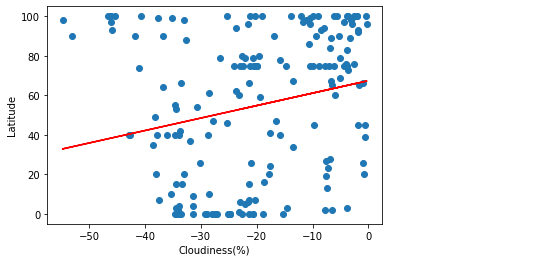

In [30]:
x_values = Southern_hemisphere['Lat']
y_values = Southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness(%)')
plt.ylabel('Latitude')
plt.savefig("Southern Cloudiness vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19360662250211869


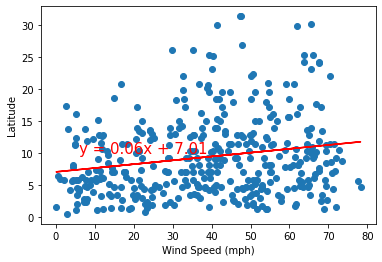

In [31]:
x_values = Northern_hemisphere['Lat']
y_values = Northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.savefig("North Wind Speed vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3517748754109623


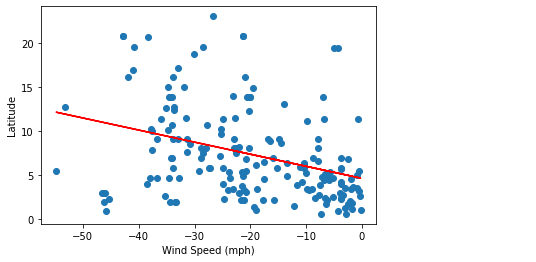

In [32]:
x_values = Southern_hemisphere['Lat']
y_values = Southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.savefig("Southern Wind Speed vs Lat.png")
print(f"The r-squared is: {rvalue}")
plt.show()